In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Carregar o modelo treinado
# Substitua o caminho pelo local onde você salvou seu modelo treinado
model = load_model('autoencoder_unet2DIV2K_model.h5')

# Função para carregar e preprocessar a imagem
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Carregar a imagem de baixa resolução
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    
    # Normalizar a imagem para o intervalo [0, 1]
    img_array = img_array / 255.0
    
    # Adicionar uma dimensão extra para representar o batch (necessário para a predição)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

# Função para pós-processar a imagem gerada
def postprocess_image(predicted_image):
    # Remover a dimensão do batch
    predicted_image = np.squeeze(predicted_image, axis=0)
    
    # Desnormalizar a imagem (voltar ao intervalo [0, 255])
    predicted_image = predicted_image * 255.0
    
    # Converter para o tipo correto (uint8) para exibição
    predicted_image = predicted_image.astype(np.uint8)
    
    return predicted_image



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


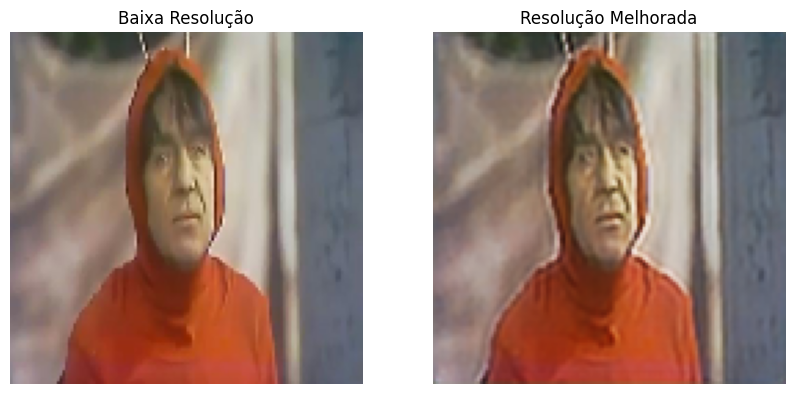

In [26]:
# Carregar e preprocessar a nova imagem
image_path = "C:\\Users\\anton\\OneDrive\\Documentos\\ML_Deep\\imag4.jpeg"  # Substitua pelo caminho da sua imagem
low_res_image = load_and_preprocess_image(image_path)

# Fazer a predição (melhorar a resolução da imagem)
high_res_image = model.predict(low_res_image)

# Pós-processar a imagem gerada
high_res_image = postprocess_image(high_res_image)

# Exibir a imagem original de baixa resolução e a imagem de alta resolução
plt.figure(figsize=(10, 5))

# Imagem de baixa resolução
plt.subplot(1, 2, 1)
plt.title("Baixa Resolução")
plt.imshow(load_img(image_path, target_size=(128, 128)))
plt.axis('off')

# Imagem de alta resolução gerada
plt.subplot(1, 2, 2)
plt.title("Resolução Melhorada")
plt.imshow(high_res_image)
plt.axis('off')

plt.show()

# Se desejar salvar a imagem gerada, use o seguinte código:
# from PIL import Image
# img = Image.fromarray(high_res_image)
# img.save('caminho_para_salvar_imagem_de_alta_resolucao.png')
